In [1]:
#load the mnist data
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [2]:
print(type(X_train),X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


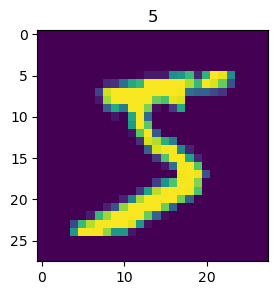

In [3]:
#visualize the data
img1 = X_train[0]
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title(y_train[0])
plt.show()

In [4]:
img1.shape

(28, 28)

In [5]:
#format the input data
feature_size = img1.shape[0]*img1.shape[1]
X_train_format = X_train.reshape(X_train.shape[0],feature_size)
X_test_format = X_test.reshape(X_test.shape[0],feature_size)
print(X_train_format.shape)

(60000, 784)


In [6]:
#normalize the input data
X_train_normal = X_train_format/255
X_test_normal = X_test_format/255
print(X_train_normal[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [7]:
#format the output data
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
print(y_train_format[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
#set uo the model
from keras.models import Sequential
from keras.layers import Dense, Activation

mlp = Sequential()
mlp.add(Dense(units=392, activation='sigmoid', input_dim=feature_size))
mlp.add(Dense(units=392, activation='sigmoid'))
mlp.add(Dense(units=10, activation='softmax'))
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 392)               154056    
                                                                 
 dense_2 (Dense)             (None, 10)                3930      
                                                                 
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [9]:
#configure the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam')

In [10]:
#train the model
mlp.fit(X_train_normal,y_train_format,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3468
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1431
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0933
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0663
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0478
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0348
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0266
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0208
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0160
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0126


In [15]:
#evaluate the model
import numpy as np
y_train_predict_probs = mlp.predict(X_train_normal)
y_train_predict = np.argmax(y_train_predict_probs, axis=1)
print(y_train_predict)

1875/1875 [==============================] - 2s 1ms/step
[5 0 4 ... 5 6 8]


In [16]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

0.9975833333333334


In [17]:
y_test_predict_probs = mlp.predict(X_test_normal)
y_test_predict = np.argmax(y_test_predict_probs, axis=1)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_train)

313/313 [==============================] - 1s 3ms/step
0.9975833333333334


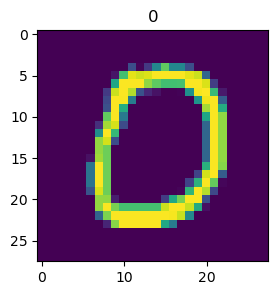

In [18]:
img2 = X_test[10]
fig2 = plt.figure(figsize=(3,3))
plt.imshow(img2)
plt.title(y_test_predict[10])
plt.show()

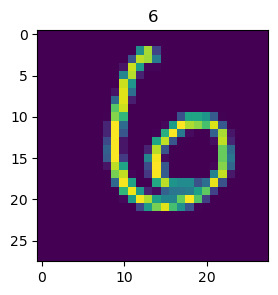

In [19]:
img3 = X_test[100]
fig3 = plt.figure(figsize=(3,3))
plt.imshow(img3)
plt.title(y_test_predict[100])
plt.show()